## DL Assignment No. 04
4. Use Autoencoder to implement anomaly detection. Build the model by using:

a. Import required libraries

b. Upload / access the dataset

c. Encoder converts it into latent representation

d. Decoder networks convert it back to the original input

e. Compile the models with Optimizer, Loss, and Evaluation Metrics

https://www.tensorflow.org/tutorials/generative/autoencoder#overview 

An autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

In [1]:
# a. Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
# b. Upload / access the dataset
dataframe = pd.read_csv('ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

In [4]:
# Feature Scaling to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [5]:
# Seperating the Normal examples from the Abnormal ones.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

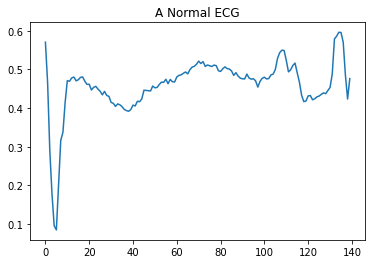

In [6]:
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

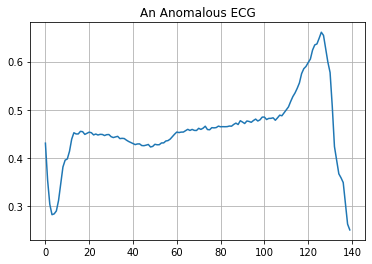

In [7]:
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [8]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        
        # c. Encoder that converts it into latent representation
        self.encoder = tf.keras.Sequential([
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu")])
        
        # d. Decoder networks that convert it back to the original input
        self.decoder = tf.keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = AnomalyDetector()

In [9]:
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(normal_train_data, normal_train_data, epochs=20, batch_size=512, validation_data=(test_data, test_data), shuffle=True)

Epoch 1/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0588 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0568 - val_loss: 0.0524
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0551 - val_loss: 0.0509
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0530 - val_loss: 0.0492
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0502 - val_loss: 0.0477
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.0461
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0433 - val_loss: 0.0444
Epoch 8/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.0429
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.0414
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0402
Epoch 11/20
5/5 [=====================

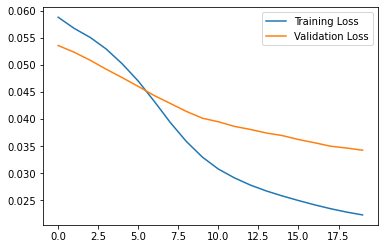

In [10]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [11]:
pred_normal_train_data = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(pred_normal_train_data, normal_train_data)
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold =", threshold)

Threshold = 0.033949047


In [12]:
pred_test_data = autoencoder(test_data)
loss = tf.keras.losses.mae(pred_test_data, test_data)
preds = tf.math.less(loss, threshold)

print("Accuracy =", (accuracy_score(test_labels, preds)))
print("Precision =", (precision_score(test_labels, preds)))
print("Recall =", (recall_score(test_labels, preds)))

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571
